In [1]:
#Import the necessary libraries (numpy and pandas)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
#read the scraped file
df = pd.read_csv('tweetfinalhealthkerala.csv')

/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (28,54,162,163,164,165,166,168,169,171,172,173,174,175,176,183,184,185,186,187,188,190,196,197,198,199,200,201,202,207,210,212,213,214,215) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 217 entries, Unnamed: 0 to user.label.longDescription
dtypes: bool(2), float64(64), int64(14), object(137)
memory usage: 32.8+ MB


In [4]:
# drop the columns that are not required
df = df.drop(['_type', 'url', 'renderedContent', 'id', 'user',
                 'quoteCount', 'conversationId', 'source', 'sourceUrl',
                 'outlinks', 'tcooutlinks', 'media', 'retweetedTweet',
                 'quotedTweet', 'inReplyToTweetId','inReplyToUser',
                 'mentionedUsers', 'coordinates', 'place', 'cashtags',
                 'user_type', 'userID', 'user_description_urls',
                 'user_protected', 'user_link_url', 'user_linkTcourl',
                 'user_profile_imageUrl', 'user_profile_bannerUrl', 'user_label',
                 'user_url', 'label._type', 'label.description', 'label.url',
                 'label.badgeUrl', 'label.longDescription', '_type', 'id',
                 'quotedTweet.mentionedUsers', 'quotedTweet.coordinates',
                 'quotedTweet.place', 'quotedTweet.hashtags', 'quotedTweet.cashtags',
                 'user.label._type', 'user.label.description', 'user.label.url',
                 'user.label.badgeUrl','user.label.longDescription', 'quotedTweet.source',
                 'quotedTweet.sourceUrl', 'quotedTweet.sourceLabel', 'quotedTweet.outlinks',
                 'quotedTweet.tcooutlinks', 'quotedTweet.media', 'quotedTweet.retweetedTweet',
                 'quotedTweet.quotedTweet', 'quotedTweet.inReplyToTweetId', 'quotedTweet.inReplyToUser'], axis = 'columns')

In [5]:
# drop additional columns that appear towards the right of the last relevant column
df.drop(df.columns[[22,23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
                    39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
                    57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
                    76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
                    95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
                    111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
                    126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
                    141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
                    156, 157, 158, 159, 160, 161]], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             20000 non-null  int64 
 1   date                   20000 non-null  object
 2   content                20000 non-null  object
 3   replyCount             20000 non-null  int64 
 4   retweetCount           20000 non-null  int64 
 5   likeCount              20000 non-null  int64 
 6   lang                   20000 non-null  object
 7   sourceLabel            20000 non-null  object
 8   hashtags               7826 non-null   object
 9   username               20000 non-null  object
 10  user_dispaly_name      19999 non-null  object
 11  user_description       17983 non-null  object
 12  user_raw_description   17983 non-null  object
 13  user_verified          20000 non-null  bool  
 14  user_created           20000 non-null  object
 15  user_followers_coun

In [7]:
# drop the rows
#df.drop(df.index[10000:20000],0,inplace=True)

In [8]:
#df.info()

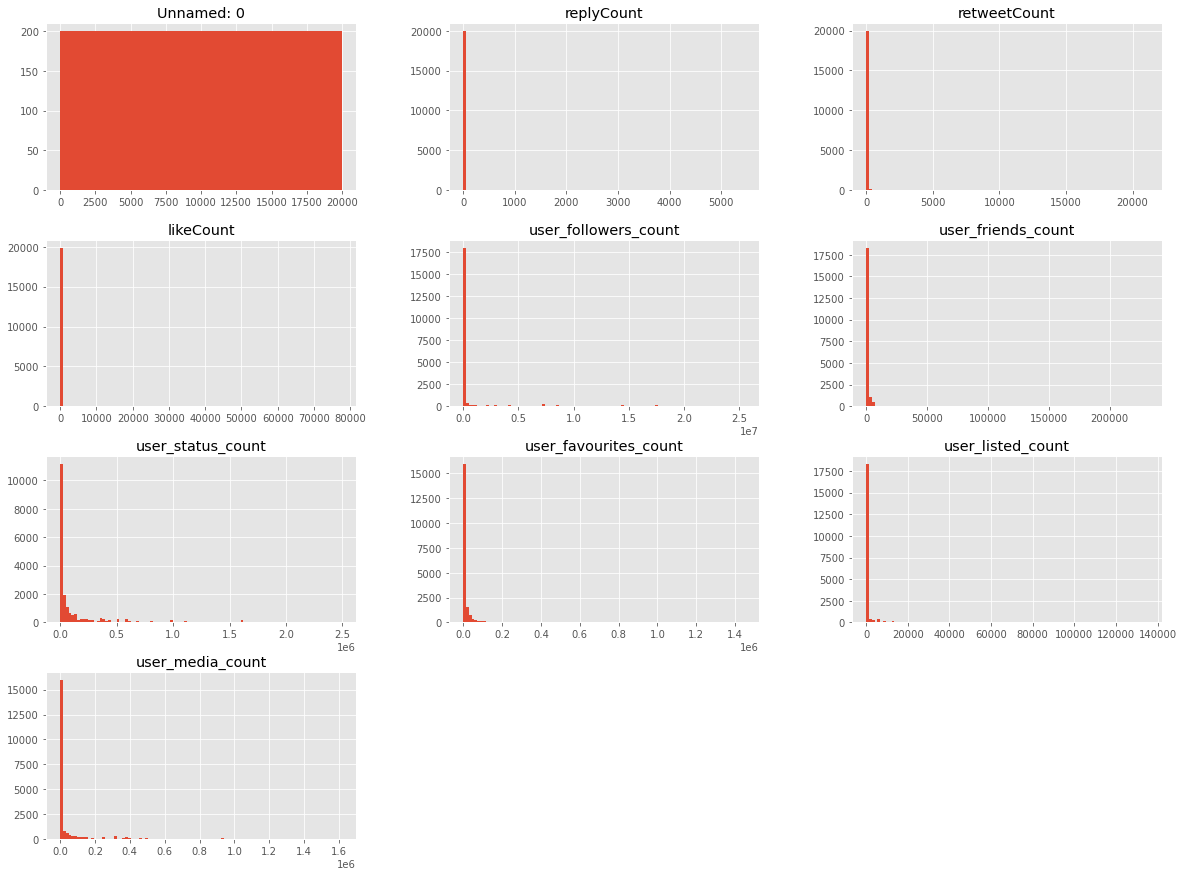

In [9]:
#visualising for better undertanding of the spread of the variables
df.hist(bins=100, figsize=(20,15))
plt.show()

In [10]:
# IMPORT modules for natural language processing

In [11]:
import re
import string
import nltk

In [12]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

In [13]:
#creating a stopwords set
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/noeljoseph/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
df.columns

Index(['Unnamed: 0', 'date', 'content', 'replyCount', 'retweetCount',
       'likeCount', 'lang', 'sourceLabel', 'hashtags', 'username',
       'user_dispaly_name', 'user_description', 'user_raw_description',
       'user_verified', 'user_created', 'user_followers_count',
       'user_friends_count', 'user_status_count', 'user_favourites_count',
       'user_listed_count', 'user_media_count', 'user_location'],
      dtype='object')

<AxesSubplot:>

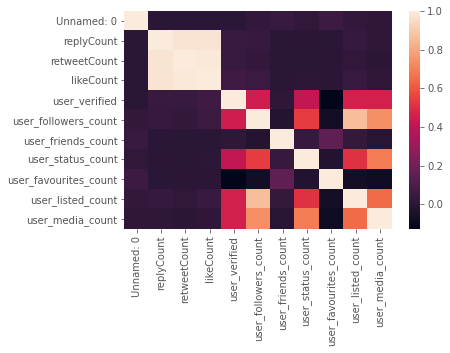

In [15]:
import seaborn as sns
sns.heatmap(df.corr())

Percentage False    0.78305
True     0.21695
Name: user_verified, dtype: float64


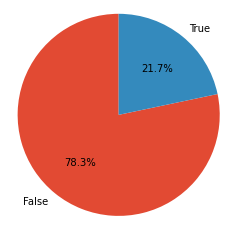

In [16]:
print('Percentage',df.user_verified.value_counts(normalize=True))
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(df['user_verified'].value_counts().tolist(), 
        labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

In [17]:
df.columns

Index(['Unnamed: 0', 'date', 'content', 'replyCount', 'retweetCount',
       'likeCount', 'lang', 'sourceLabel', 'hashtags', 'username',
       'user_dispaly_name', 'user_description', 'user_raw_description',
       'user_verified', 'user_created', 'user_followers_count',
       'user_friends_count', 'user_status_count', 'user_favourites_count',
       'user_listed_count', 'user_media_count', 'user_location'],
      dtype='object')

In [18]:
# make a new dataframe with only content
content_df = df.drop(['Unnamed: 0', 'date', 'replyCount', 'retweetCount',
                      'likeCount', 'lang', 'sourceLabel', 'hashtags', 'username',
                      'user_dispaly_name', 'user_description', 'user_raw_description',
                      'user_verified', 'user_created', 'user_followers_count',
                      'user_friends_count', 'user_status_count', 'user_favourites_count',
                      'user_listed_count', 'user_media_count', 'user_location'], axis=1)
content_df.head()

,content
0,@KeralaHealth @VeenaGeorge03 what a shame and ...
1,Meeting constituents on a wide range of issues...
2,"Home Minister Amit Shah reaches AIIMS, New Del..."
3,My point was totally different. You are not ge...
4,@ArvindKejriwal Btw Some days back Kerala was ...


In [19]:
content_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  20000 non-null  object
dtypes: object(1)
memory usage: 156.4+ KB


In [20]:
content_df = content_df.rename(columns={'content':'tokenized_content'})

In [21]:
content_df.head()

,tokenized_content
0,@KeralaHealth @VeenaGeorge03 what a shame and ...
1,Meeting constituents on a wide range of issues...
2,"Home Minister Amit Shah reaches AIIMS, New Del..."
3,My point was totally different. You are not ge...
4,@ArvindKejriwal Btw Some days back Kerala was ...


In [22]:
def preprocess_content_text(content):
    
    #convert all text to lowercase
    content = content.lower()
    
    #remove any urls
    content = re.sub(r"http\S+|www\S+|https\s+", "", content, flags=re.MULTILINE)
    
    #remove punctuations
    content = content.translate(str.maketrans("", "", string.punctuation))
    
    #remove # from tweet
    content = re.sub(r'\#', "", content)
    
    #remove stopwords
    content_tokens = word_tokenize(content)
    filtered_words = [word for word in content_tokens if word not in stop_words]
    
    #stemming
    #ps = PorterStemmer()
    #stemmed_words = [ps.stem(w) for w in filtered_words]
    
    #lemmatizing
    #lemmatizer = WordNetLemmatizer()
    #lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(filtered_words)
    

In [23]:
content_df.tokenized_content = content_df['tokenized_content'].apply(preprocess_content_text)

In [24]:
content_df.tokenized_content.head()
                

0    keralahealth veenageorge03 shame pity massive ...
1    meeting constituents wide range issues congrat...
2    home minister amit shah reaches aiims new delh...
3    point totally different getting rat poison sou...
4    arvindkejriwal btw days back kerala adjudged b...
Name: tokenized_content, dtype: object

In [25]:
#content_df = content_df.drop_duplicates('content')

In [26]:
#stemming
stemmer = PorterStemmer()
def stemming(data):
    content = [stemmer.stem(word) for word in data]
    return data

In [27]:
content_df['tokenized_content'] = content_df['tokenized_content'].apply(lambda x: stemming(x))

In [28]:
# check the data after pre-processing
content_df['tokenized_content'][0]

'keralahealth veenageorge03 shame pity massive rabies vaccine palakkad district health centres hospitals people struggling even travelling 50km luckcmokerala pinarayivijayan'

In [29]:
# import VADER for sentiment analysis
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/noeljoseph/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [30]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [31]:
def sentiment_vader(content):
    over_all_polarity = sia.polarity_scores(content)
    if over_all_polarity['compound'] >= 0.05:
        return "positive"
    elif over_all_polarity['compound'] <= -0.05:
        return "negative"
    else:
        return "neutral"

In [32]:
content_df['sentiment_vader'] = content_df['tokenized_content'].apply(lambda x: sentiment_vader(x))

In [33]:
#diplay the dataframe with the new column for sentiment
content_df

,tokenized_content,sentiment_vader
0,keralahealth veenageorge03 shame pity massive ...,negative
1,meeting constituents wide range issues congrat...,neutral
2,home minister amit shah reaches aiims new delh...,negative
3,point totally different getting rat poison sou...,negative
4,arvindkejriwal btw days back kerala adjudged b...,positive
...,...,...
19995,short hindu temple anywhere india muslim chris...,positive
19996,kerala health worker ’ fb post siva temple lak...,neutral
19997,1798 asha workers infected covid kerala far tw...,negative
19998,kerala health services department ’ dr aarathy...,positive


Percentage positive    0.45135
neutral     0.30205
negative    0.24660
Name: sentiment_vader, dtype: float64


<AxesSubplot:ylabel='sentiment_vader'>

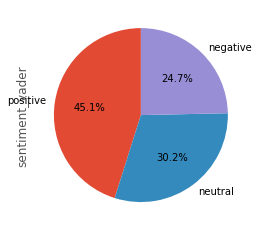

In [34]:
print('Percentage',content_df['sentiment_vader'].value_counts(normalize=True))
content_df.sentiment_vader.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', startangle=90 
                                                            )

In [35]:
#### extracting the terms for state
def positive_mention_state(content):
    terms = re.findall("veena|state|sailaja|minister", content)
    
    return terms

In [36]:
content_df['sub_national_terms_mentioned'] = content_df['tokenized_content'].apply(lambda x: positive_mention_state(x))

In [37]:
content_df

,tokenized_content,sentiment_vader,sub_national_terms_mentioned
0,keralahealth veenageorge03 shame pity massive ...,negative,[veena]
1,meeting constituents wide range issues congrat...,neutral,[]
2,home minister amit shah reaches aiims new delh...,negative,[minister]
3,point totally different getting rat poison sou...,negative,[]
4,arvindkejriwal btw days back kerala adjudged b...,positive,"[sailaja, minister]"
...,...,...,...
19995,short hindu temple anywhere india muslim chris...,positive,[]
19996,kerala health worker ’ fb post siva temple lak...,neutral,[]
19997,1798 asha workers infected covid kerala far tw...,negative,[veena]
19998,kerala health services department ’ dr aarathy...,positive,[]


In [38]:
#### extracting the terms for centre
def positive_mention_state(content):
    terms = re.findall("modi|centre|BJP|north|other states", content)
    
    return terms

In [39]:
content_df['centre_terms_mentioned'] = content_df['tokenized_content'].apply(lambda x: positive_mention_state(x))

In [40]:
#extracting the positive for state

def perception(content):
    if(content['sentiment_vader'] == 'positive' and len(content['sub_national_terms_mentioned'])!=0):
        return 'correct'
    elif(content['sentiment_vader'] == 'negative' and len(content['sub_national_terms_mentioned'])!=0):
        return 'correct'
    elif(content['sentiment_vader'] == 'positive' and len(content['centre_terms_mentioned'])!=0):
        return 'incorrect'
    elif(content['sentiment_vader'] == 'negative' and len(content['centre_terms_mentioned'])!=0):
        return 'incorrect'
    
    return 'non opinionated'

In [41]:
content_df['perception'] = content_df.apply(perception, axis=1)

In [42]:
content_df

,tokenized_content,sentiment_vader,sub_national_terms_mentioned,centre_terms_mentioned,perception
0,keralahealth veenageorge03 shame pity massive ...,negative,[veena],[centre],correct
1,meeting constituents wide range issues congrat...,neutral,[],[],non opinionated
2,home minister amit shah reaches aiims new delh...,negative,[minister],[],correct
3,point totally different getting rat poison sou...,negative,[],[],non opinionated
4,arvindkejriwal btw days back kerala adjudged b...,positive,"[sailaja, minister]",[],correct
...,...,...,...,...,...
19995,short hindu temple anywhere india muslim chris...,positive,[],[],non opinionated
19996,kerala health worker ’ fb post siva temple lak...,neutral,[],[],non opinionated
19997,1798 asha workers infected covid kerala far tw...,negative,[veena],[],correct
19998,kerala health services department ’ dr aarathy...,positive,[],[],non opinionated


In [43]:
df.head()

,Unnamed: 0,date,content,replyCount,retweetCount,likeCount,lang,sourceLabel,hashtags,username,...,user_raw_description,user_verified,user_created,user_followers_count,user_friends_count,user_status_count,user_favourites_count,user_listed_count,user_media_count,user_location
0,0,2022-08-20 11:14:14+00:00,@KeralaHealth @VeenaGeorge03 what a shame and ...,0,0,0,en,Twitter for Android,NaN,kiranmsj,...,NaN,False,2016-04-15T14:23:02+00:00,158,350,88366,76123,1,595,NaN
1,1,2022-08-20 11:05:10+00:00,Meeting constituents on a wide range of issues...,9,22,176,en,Twitter for iPhone,NaN,ShashiTharoor,...,INC. MP for Thiruvananthapuram. Author of 23 b...,True,2009-03-16T15:12:51+00:00,8372495,1110,67294,22922,13072,11460,New Delhi & Thiruvananthapuram
2,2,2022-08-20 09:43:51+00:00,"Home Minister Amit Shah reaches AIIMS, New Del...",0,0,0,en,Twitter for Android,['ITBP'],AdvSrreenath,...,"ADVOCATE at District Court Kollam, Kerala .\n𝐊...",False,2022-08-07T12:24:10+00:00,1,119,3,0,0,3,NaN
3,3,2022-08-20 09:01:18+00:00,My point was totally different. You are not ge...,1,1,1,en,Twitter for Android,NaN,kbalakumar,...,Ex-Editor News Today. Humour Writer. Now freel...,True,2009-02-18T04:31:13+00:00,11204,646,89397,18222,287,1840,Chennai
4,4,2022-08-20 08:34:25+00:00,@ArvindKejriwal Btw Some days back Kerala was ...,0,0,1,en,Twitter for Android,NaN,padmakumarnair,...,धर्मो रक्षति रक्षितः 🚩\nseen my world |\nFour ...,False,2009-08-23T04:47:26+00:00,1781,1802,21711,101017,2,906,"Kramsk, Polska"


In [44]:
content_perception_df = pd.concat([content_df, df], axis=1)

In [45]:
content_perception_df.head()

,tokenized_content,sentiment_vader,sub_national_terms_mentioned,centre_terms_mentioned,perception,Unnamed: 0,date,content,replyCount,retweetCount,...,user_raw_description,user_verified,user_created,user_followers_count,user_friends_count,user_status_count,user_favourites_count,user_listed_count,user_media_count,user_location
0,keralahealth veenageorge03 shame pity massive ...,negative,[veena],[centre],correct,0,2022-08-20 11:14:14+00:00,@KeralaHealth @VeenaGeorge03 what a shame and ...,0,0,...,NaN,False,2016-04-15T14:23:02+00:00,158,350,88366,76123,1,595,NaN
1,meeting constituents wide range issues congrat...,neutral,[],[],non opinionated,1,2022-08-20 11:05:10+00:00,Meeting constituents on a wide range of issues...,9,22,...,INC. MP for Thiruvananthapuram. Author of 23 b...,True,2009-03-16T15:12:51+00:00,8372495,1110,67294,22922,13072,11460,New Delhi & Thiruvananthapuram
2,home minister amit shah reaches aiims new delh...,negative,[minister],[],correct,2,2022-08-20 09:43:51+00:00,"Home Minister Amit Shah reaches AIIMS, New Del...",0,0,...,"ADVOCATE at District Court Kollam, Kerala .\n𝐊...",False,2022-08-07T12:24:10+00:00,1,119,3,0,0,3,NaN
3,point totally different getting rat poison sou...,negative,[],[],non opinionated,3,2022-08-20 09:01:18+00:00,My point was totally different. You are not ge...,1,1,...,Ex-Editor News Today. Humour Writer. Now freel...,True,2009-02-18T04:31:13+00:00,11204,646,89397,18222,287,1840,Chennai
4,arvindkejriwal btw days back kerala adjudged b...,positive,"[sailaja, minister]",[],correct,4,2022-08-20 08:34:25+00:00,@ArvindKejriwal Btw Some days back Kerala was ...,0,0,...,धर्मो रक्षति रक्षितः 🚩\nseen my world |\nFour ...,False,2009-08-23T04:47:26+00:00,1781,1802,21711,101017,2,906,"Kramsk, Polska"


Percentage non opinionated    0.6309
correct            0.3449
incorrect          0.0242
Name: perception, dtype: float64


<AxesSubplot:ylabel='perception'>

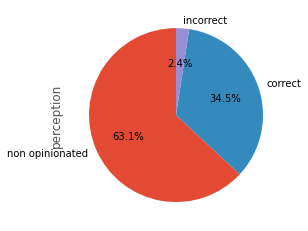

In [46]:
print('Percentage',content_perception_df.perception.value_counts(normalize=True))
content_perception_df.perception.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', startangle=90)

In [47]:
#def perception(voter):
    #if voter == "1":
        #return "correct"
    #elif voter == "":
        #return "non-partisan"
    #elif voter == "0":
        #return "incorrect"

In [48]:
#content_perception_df['voter'] = content_perception_df['voter_perception'].apply(perception)

In [49]:
#content_perception_df

In [50]:
#fig = plt.figure(figsize=(5,5))
#sns.countplot(x='voter', data = content_perception_df)

#### fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor': "black"}
tags = content_perception_df['voter'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors, startangle=90, wedgeprops = wp,
         explode = explode, label="")
plt.title("attribution of responsibility by voters")

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [52]:
vect = CountVectorizer(ngram_range=(1,2)).fit(content_perception_df['tokenized_content'])

In [53]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 217657

First 20 features:
 ['0001', '0001 kerala', '000220', '00071', '00071 baseline', '001', '001 health', '00102021', '00102021 formats', '002', '002 vs', '004', '004 eth', '005', '005 per', '007', '007 shameerkb98', '007khan143', '007khan143 naseervoice', '008']


In [54]:
x = content_perception_df['tokenized_content']
y = content_perception_df['perception']
x = vect.transform(x)

In [55]:
x.shape

(20000, 217657)

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [57]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (16000, 217657)
Size of y_train: (16000,)
Size of x_test: (4000, 217657)
Size of y_test: (4000,)


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [59]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test Accuracy: {:.2f}%".format(logreg_acc*100))

Test Accuracy: 89.55%


/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[1112    1  241]
 [   2   40   55]
 [ 118    1 2430]]


                 precision    recall  f1-score   support

        correct       0.90      0.82      0.86      1354
      incorrect       0.95      0.41      0.58        97
non opinionated       0.89      0.95      0.92      2549

       accuracy                           0.90      4000
      macro avg       0.92      0.73      0.79      4000
   weighted avg       0.90      0.90      0.89      4000



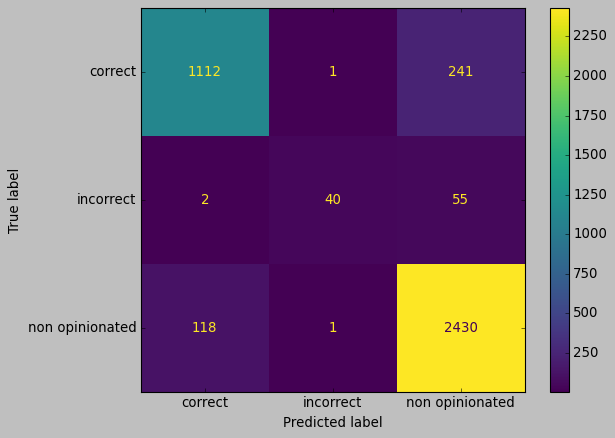

In [61]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
param_grid={'C':[0.001,0.01,0.1,1,10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [64]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 1}


In [65]:
y_pred= grid.predict(x_test)

In [66]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 89.55%


In [67]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[1112    1  241]
 [   2   40   55]
 [ 118    1 2430]]


                 precision    recall  f1-score   support

        correct       0.90      0.82      0.86      1354
      incorrect       0.95      0.41      0.58        97
non opinionated       0.89      0.95      0.92      2549

       accuracy                           0.90      4000
      macro avg       0.92      0.73      0.79      4000
   weighted avg       0.90      0.90      0.89      4000



In [68]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [69]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:2f}%".format(svc_acc*100))

test accuracy: 89.050000%


In [70]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[1116    2  236]
 [   1   54   42]
 [ 155    2 2392]]


                 precision    recall  f1-score   support

        correct       0.88      0.82      0.85      1354
      incorrect       0.93      0.56      0.70        97
non opinionated       0.90      0.94      0.92      2549

       accuracy                           0.89      4000
      macro avg       0.90      0.77      0.82      4000
   weighted avg       0.89      0.89      0.89      4000



In [71]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel': ["linear", "poly", "rbf", "sigmoid"],
    'degree': [1,3,5,7],
    'gamma': [0.01, 1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [72]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 0.1}


In [73]:
y_pred = grid.predict(x_test)

In [74]:
logreg_acc= accuracy_score(y_pred, y_test)
print("Test Accuracy: {:.2f}%".format(logreg_acc*100))

Test Accuracy: 89.65%


In [75]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[1127    2  225]
 [   1   50   46]
 [ 139    1 2409]]


                 precision    recall  f1-score   support

        correct       0.89      0.83      0.86      1354
      incorrect       0.94      0.52      0.67        97
non opinionated       0.90      0.95      0.92      2549

       accuracy                           0.90      4000
      macro avg       0.91      0.76      0.82      4000
   weighted avg       0.90      0.90      0.89      4000



In [76]:
content_perception_df

,tokenized_content,sentiment_vader,sub_national_terms_mentioned,centre_terms_mentioned,perception,Unnamed: 0,date,content,replyCount,retweetCount,...,user_raw_description,user_verified,user_created,user_followers_count,user_friends_count,user_status_count,user_favourites_count,user_listed_count,user_media_count,user_location
0,keralahealth veenageorge03 shame pity massive ...,negative,[veena],[centre],correct,0,2022-08-20 11:14:14+00:00,@KeralaHealth @VeenaGeorge03 what a shame and ...,0,0,...,NaN,False,2016-04-15T14:23:02+00:00,158,350,88366,76123,1,595,NaN
1,meeting constituents wide range issues congrat...,neutral,[],[],non opinionated,1,2022-08-20 11:05:10+00:00,Meeting constituents on a wide range of issues...,9,22,...,INC. MP for Thiruvananthapuram. Author of 23 b...,True,2009-03-16T15:12:51+00:00,8372495,1110,67294,22922,13072,11460,New Delhi & Thiruvananthapuram
2,home minister amit shah reaches aiims new delh...,negative,[minister],[],correct,2,2022-08-20 09:43:51+00:00,"Home Minister Amit Shah reaches AIIMS, New Del...",0,0,...,"ADVOCATE at District Court Kollam, Kerala .\n𝐊...",False,2022-08-07T12:24:10+00:00,1,119,3,0,0,3,NaN
3,point totally different getting rat poison sou...,negative,[],[],non opinionated,3,2022-08-20 09:01:18+00:00,My point was totally different. You are not ge...,1,1,...,Ex-Editor News Today. Humour Writer. Now freel...,True,2009-02-18T04:31:13+00:00,11204,646,89397,18222,287,1840,Chennai
4,arvindkejriwal btw days back kerala adjudged b...,positive,"[sailaja, minister]",[],correct,4,2022-08-20 08:34:25+00:00,@ArvindKejriwal Btw Some days back Kerala was ...,0,0,...,धर्मो रक्षति रक्षितः 🚩\nseen my world |\nFour ...,False,2009-08-23T04:47:26+00:00,1781,1802,21711,101017,2,906,"Kramsk, Polska"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,short hindu temple anywhere india muslim chris...,positive,[],[],non opinionated,19995,2021-05-29 07:08:33+00:00,"In short, a Hindu temple in anywhere in India,...",0,0,...,World is a beautiful dream; Truth is beautiful...,False,2020-07-19T10:24:21+00:00,0,90,291,185,0,0,NaN
19996,kerala health worker ’ fb post siva temple lak...,neutral,[],[],non opinionated,19996,2021-05-29 07:01:32+00:00,Kerala health worker’s FB post on Siva temple ...,0,0,...,ιт ρяσƒ. 🧑‍💻🐦тωєєтѕ αвσυт тнσυgнтѕ ση ¢яι¢кєт🏏...,False,2010-07-05T06:30:33+00:00,367,1646,29578,1707,11,692,United Arab Emirates
19997,1798 asha workers infected covid kerala far tw...,negative,[veena],[],correct,19997,2021-05-29 06:47:20+00:00,"1,798 #ASHA workers infected with #Covid in #K...",0,0,...,"ex journo. Previously with TNIE, Deccan Chroni...",False,2014-01-02T06:08:09+00:00,438,542,1480,3416,6,306,Kozhikode
19998,kerala health services department ’ dr aarathy...,positive,[],[],non opinionated,19998,2021-05-29 06:43:07+00:00,Kerala health services department’s Dr Aarathy...,2,7,...,Sign up for #MCPro for the most useful insight...,True,2009-08-26T07:55:29+00:00,1315705,347,371899,1196,3506,91916,Mumbai


In [77]:
content_perception_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   tokenized_content             20000 non-null  object
 1   sentiment_vader               20000 non-null  object
 2   sub_national_terms_mentioned  20000 non-null  object
 3   centre_terms_mentioned        20000 non-null  object
 4   perception                    20000 non-null  object
 5   Unnamed: 0                    20000 non-null  int64 
 6   date                          20000 non-null  object
 7   content                       20000 non-null  object
 8   replyCount                    20000 non-null  int64 
 9   retweetCount                  20000 non-null  int64 
 10  likeCount                     20000 non-null  int64 
 11  lang                          20000 non-null  object
 12  sourceLabel                   20000 non-null  object
 13  hashtags        

In [78]:
import numpy as np
import matplotlib.pyplot as plt

In [79]:
#transpose the df description so it is easier to read.
count_content = content_perception_df.describe().transpose()

In [80]:
 from datetime import datetime

In [81]:
content_perception_df['date']

0        2022-08-20 11:14:14+00:00
1        2022-08-20 11:05:10+00:00
2        2022-08-20 09:43:51+00:00
3        2022-08-20 09:01:18+00:00
4        2022-08-20 08:34:25+00:00
                   ...            
19995    2021-05-29 07:08:33+00:00
19996    2021-05-29 07:01:32+00:00
19997    2021-05-29 06:47:20+00:00
19998    2021-05-29 06:43:07+00:00
19999    2021-05-29 06:30:54+00:00
Name: date, Length: 20000, dtype: object

In [82]:
content_perception_df[['user_created','date']] = content_perception_df[['user_created','date']].apply(pd.to_datetime) #if conversion required
content_perception_df['days_on_twitter'] = (content_perception_df['date'] - content_perception_df['user_created']).dt.days

In [83]:
content_perception_df['tweets_per_day'] = content_perception_df['user_status_count'] / content_perception_df['days_on_twitter']

In [84]:
content_perception_df

,tokenized_content,sentiment_vader,sub_national_terms_mentioned,centre_terms_mentioned,perception,Unnamed: 0,date,content,replyCount,retweetCount,...,user_created,user_followers_count,user_friends_count,user_status_count,user_favourites_count,user_listed_count,user_media_count,user_location,days_on_twitter,tweets_per_day
0,keralahealth veenageorge03 shame pity massive ...,negative,[veena],[centre],correct,0,2022-08-20 11:14:14+00:00,@KeralaHealth @VeenaGeorge03 what a shame and ...,0,0,...,2016-04-15 14:23:02+00:00,158,350,88366,76123,1,595,NaN,2317,38.138110
1,meeting constituents wide range issues congrat...,neutral,[],[],non opinionated,1,2022-08-20 11:05:10+00:00,Meeting constituents on a wide range of issues...,9,22,...,2009-03-16 15:12:51+00:00,8372495,1110,67294,22922,13072,11460,New Delhi & Thiruvananthapuram,4904,13.722268
2,home minister amit shah reaches aiims new delh...,negative,[minister],[],correct,2,2022-08-20 09:43:51+00:00,"Home Minister Amit Shah reaches AIIMS, New Del...",0,0,...,2022-08-07 12:24:10+00:00,1,119,3,0,0,3,NaN,12,0.250000
3,point totally different getting rat poison sou...,negative,[],[],non opinionated,3,2022-08-20 09:01:18+00:00,My point was totally different. You are not ge...,1,1,...,2009-02-18 04:31:13+00:00,11204,646,89397,18222,287,1840,Chennai,4931,18.129588
4,arvindkejriwal btw days back kerala adjudged b...,positive,"[sailaja, minister]",[],correct,4,2022-08-20 08:34:25+00:00,@ArvindKejriwal Btw Some days back Kerala was ...,0,0,...,2009-08-23 04:47:26+00:00,1781,1802,21711,101017,2,906,"Kramsk, Polska",4745,4.575553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,short hindu temple anywhere india muslim chris...,positive,[],[],non opinionated,19995,2021-05-29 07:08:33+00:00,"In short, a Hindu temple in anywhere in India,...",0,0,...,2020-07-19 10:24:21+00:00,0,90,291,185,0,0,NaN,313,0.929712
19996,kerala health worker ’ fb post siva temple lak...,neutral,[],[],non opinionated,19996,2021-05-29 07:01:32+00:00,Kerala health worker’s FB post on Siva temple ...,0,0,...,2010-07-05 06:30:33+00:00,367,1646,29578,1707,11,692,United Arab Emirates,3981,7.429792
19997,1798 asha workers infected covid kerala far tw...,negative,[veena],[],correct,19997,2021-05-29 06:47:20+00:00,"1,798 #ASHA workers infected with #Covid in #K...",0,0,...,2014-01-02 06:08:09+00:00,438,542,1480,3416,6,306,Kozhikode,2704,0.547337
19998,kerala health services department ’ dr aarathy...,positive,[],[],non opinionated,19998,2021-05-29 06:43:07+00:00,Kerala health services department’s Dr Aarathy...,2,7,...,2009-08-26 07:55:29+00:00,1315705,347,371899,1196,3506,91916,Mumbai,4293,86.629164


In [85]:
from scipy import stats

In [86]:
content_perception_df['user_verified'].value_counts()

False    15661
True      4339
Name: user_verified, dtype: int64

In [87]:
content_perception_df['perception'].value_counts()

non opinionated    12618
correct             6898
incorrect            484
Name: perception, dtype: int64

In [88]:
pd.crosstab(content_perception_df['user_verified'], content_perception_df['perception'])

perception,correct,incorrect,non opinionated
user_verified,,,
False,5060,428,10173
True,1838,56,2445


In [89]:
crosstab = pd.crosstab(content_perception_df['user_verified'], content_perception_df['perception'])
crosstab

perception,correct,incorrect,non opinionated
user_verified,,,
False,5060,428,10173
True,1838,56,2445


In [90]:
stats.chi2_contingency(crosstab)

(168.6189245186056,
 2.4258601959653192e-37,
 2,
 array([[5401.4789,  378.9962, 9880.5249],
        [1496.5211,  105.0038, 2737.4751]]))

In [91]:
content_perception_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   tokenized_content             20000 non-null  object             
 1   sentiment_vader               20000 non-null  object             
 2   sub_national_terms_mentioned  20000 non-null  object             
 3   centre_terms_mentioned        20000 non-null  object             
 4   perception                    20000 non-null  object             
 5   Unnamed: 0                    20000 non-null  int64              
 6   date                          20000 non-null  datetime64[ns, UTC]
 7   content                       20000 non-null  object             
 8   replyCount                    20000 non-null  int64              
 9   retweetCount                  20000 non-null  int64              
 10  likeCount                     2000

In [92]:
new_content_perception_df = content_perception_df.drop(['tokenized_content', 'sentiment_vader', 'sub_national_terms_mentioned',
                 'centre_terms_mentioned', 'Unnamed: 0'], axis = 'columns')

In [93]:
new_content_perception_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   perception             20000 non-null  object             
 1   date                   20000 non-null  datetime64[ns, UTC]
 2   content                20000 non-null  object             
 3   replyCount             20000 non-null  int64              
 4   retweetCount           20000 non-null  int64              
 5   likeCount              20000 non-null  int64              
 6   lang                   20000 non-null  object             
 7   sourceLabel            20000 non-null  object             
 8   hashtags               7826 non-null   object             
 9   username               20000 non-null  object             
 10  user_dispaly_name      19999 non-null  object             
 11  user_description       17983 non-null  object         

<AxesSubplot:xlabel='perception', ylabel='count'>

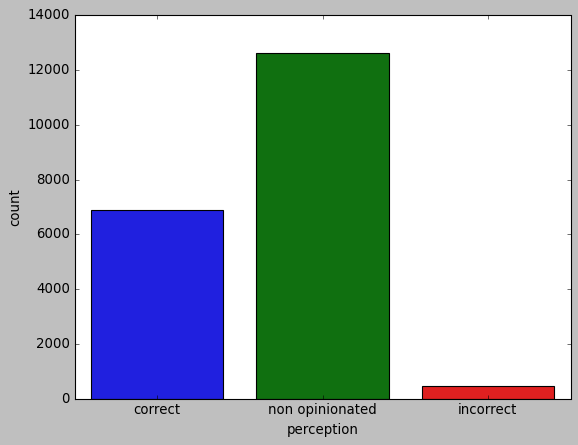

In [94]:
sns.countplot(x='perception',data=new_content_perception_df)

In [95]:
content_test_df.content = content_test_df['content'].apply(preprocess_content_test_text)

NameError: name 'content_test_df' is not defined

In [ ]:
content_test_df.content.head()

In [ ]:
#stemming
stemmer = PorterStemmer()
def stemming(data):
    content = [stemmer.stem(word) for word in data]
    return data

In [ ]:
content_test_df['content'] = content_test_df['content'].apply(lambda x: stemming(x))

In [ ]:
content_test_df

In [ ]:
vect = CountVectorizer(ngram_range=(1,2)).fit(content_test_df['content'])

In [ ]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

In [ ]:
x = content_test_df['content']
x = vect.transform(x)

In [ ]:
x.shape

In [ ]:
content_test_df.shape

In [ ]:
prediction = SVCmodel.predict(x)